In [1]:
import os,os.path
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from sklearn.model_selection import train_test_split
from collections import Counter
from concurrent import futures
import threading
import glob
from sklearn.preprocessing import LabelEncoder
import datetime
import cv2

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [5]:
#read images
sample_image = mpimg.imread(r"C:\Users\Muruganandam\Desktop\MakeAthon\Ref\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_60.png")
DIR = r'C:\Users\Muruganandam\Desktop\MakeAthon\Ref\cell_images\Uninfected'
uninfected_count = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print (uninfected_count)


13780


AxesImage(54,36;334.8x217.44)
Shape of image (136, 127, 3)


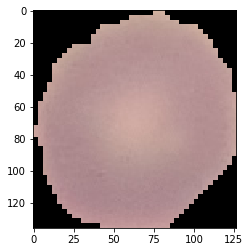

In [6]:
#vrify_sample image and its size
print(plt.imshow(sample_image))
print ("Shape of image",sample_image.shape)

In [7]:
import glob

for image_path in glob.glob(r"C:\Users\Muruganandam\Desktop\MakeAthon\Ref\cell_images\Uninfected\\*.png"):
    im = matplotlib.pyplot.imread(image_path)
    print (im.shape)
    #print (im.dtype)

(139, 160, 3)
(136, 145, 3)
(142, 145, 3)
(112, 100, 3)
(139, 124, 3)
(118, 118, 3)
(130, 157, 3)
(118, 130, 3)
(172, 145, 3)
(136, 148, 3)
(148, 142, 3)
(133, 139, 3)
(121, 136, 3)
(139, 118, 3)
(124, 145, 3)
(160, 139, 3)
(163, 136, 3)
(193, 181, 3)
(139, 151, 3)
(133, 157, 3)
(148, 136, 3)
(172, 133, 3)
(160, 136, 3)
(118, 106, 3)
(154, 166, 3)
(187, 160, 3)
(130, 151, 3)
(109, 100, 3)
(130, 130, 3)
(142, 115, 3)
(124, 91, 3)
(148, 142, 3)
(136, 124, 3)
(142, 184, 3)
(163, 145, 3)
(142, 124, 3)
(142, 154, 3)
(127, 142, 3)
(133, 184, 3)
(151, 154, 3)
(130, 121, 3)
(178, 118, 3)
(145, 139, 3)
(118, 85, 3)
(157, 136, 3)
(175, 193, 3)
(157, 127, 3)
(175, 154, 3)
(136, 157, 3)
(172, 139, 3)
(145, 124, 3)
(172, 139, 3)
(136, 109, 3)
(151, 127, 3)
(163, 157, 3)
(142, 163, 3)
(148, 154, 3)
(136, 142, 3)
(139, 124, 3)
(202, 148, 3)
(169, 154, 3)
(172, 148, 3)
(127, 139, 3)
(154, 139, 3)
(139, 136, 3)
(145, 145, 3)
(151, 160, 3)
(103, 169, 3)
(151, 142, 3)
(115, 130, 3)
(139, 145, 3)
(136, 13

(136, 136, 3)
(130, 133, 3)
(127, 133, 3)
(124, 127, 3)
(124, 127, 3)
(106, 109, 3)
(115, 130, 3)
(118, 121, 3)
(109, 106, 3)
(109, 127, 3)
(106, 100, 3)
(112, 121, 3)
(124, 115, 3)
(118, 124, 3)
(112, 115, 3)
(127, 139, 3)
(127, 124, 3)
(103, 121, 3)
(112, 106, 3)
(121, 124, 3)
(118, 118, 3)
(151, 136, 3)
(127, 127, 3)
(124, 112, 3)
(136, 112, 3)
(115, 112, 3)
(121, 112, 3)
(148, 121, 3)
(106, 121, 3)
(130, 109, 3)
(103, 106, 3)
(133, 115, 3)
(97, 100, 3)
(112, 115, 3)
(124, 106, 3)
(130, 127, 3)
(106, 106, 3)
(106, 109, 3)
(112, 115, 3)
(106, 124, 3)
(103, 115, 3)
(157, 133, 3)
(127, 115, 3)
(142, 130, 3)
(130, 112, 3)
(142, 136, 3)
(127, 139, 3)
(100, 91, 3)
(94, 103, 3)
(100, 103, 3)
(118, 118, 3)
(124, 112, 3)
(112, 109, 3)
(97, 103, 3)
(103, 88, 3)
(118, 106, 3)
(127, 115, 3)
(100, 100, 3)
(100, 100, 3)
(109, 103, 3)
(118, 112, 3)
(112, 112, 3)
(118, 115, 3)
(97, 91, 3)
(130, 118, 3)
(136, 121, 3)
(133, 121, 3)
(118, 118, 3)
(154, 121, 3)
(136, 115, 3)
(124, 115, 3)
(106, 115, 3)

(145, 157, 3)
(139, 154, 3)
(142, 139, 3)
(127, 133, 3)
(142, 130, 3)
(163, 163, 3)
(145, 145, 3)
(145, 145, 3)
(151, 169, 3)
(139, 115, 3)
(145, 118, 3)
(139, 148, 3)
(118, 115, 3)
(121, 124, 3)
(121, 103, 3)
(109, 112, 3)
(115, 118, 3)
(112, 124, 3)
(133, 112, 3)
(148, 118, 3)
(148, 133, 3)
(121, 136, 3)
(142, 169, 3)
(139, 112, 3)
(118, 112, 3)
(115, 133, 3)
(145, 115, 3)
(148, 121, 3)
(133, 109, 3)
(118, 106, 3)
(139, 157, 3)
(160, 130, 3)
(157, 130, 3)
(133, 142, 3)
(139, 115, 3)
(130, 151, 3)
(139, 133, 3)
(124, 163, 3)
(121, 142, 3)
(109, 133, 3)
(139, 124, 3)
(103, 97, 3)
(124, 154, 3)
(130, 124, 3)
(130, 133, 3)
(136, 181, 3)
(145, 151, 3)
(124, 148, 3)
(124, 130, 3)
(160, 127, 3)
(109, 130, 3)
(118, 130, 3)
(130, 133, 3)
(76, 109, 3)
(145, 154, 3)
(130, 115, 3)
(139, 112, 3)
(133, 139, 3)
(133, 118, 3)
(136, 136, 3)
(169, 127, 3)
(124, 142, 3)
(142, 115, 3)
(127, 115, 3)
(112, 127, 3)
(157, 127, 3)
(139, 133, 3)
(133, 139, 3)
(103, 112, 3)
(148, 136, 3)
(142, 142, 3)
(121, 12

(184, 106, 3)
(136, 130, 3)
(130, 136, 3)
(127, 124, 3)
(133, 127, 3)
(163, 172, 3)
(136, 115, 3)
(145, 148, 3)
(127, 127, 3)
(139, 133, 3)
(139, 133, 3)
(127, 121, 3)
(154, 142, 3)
(175, 124, 3)
(106, 115, 3)
(151, 133, 3)
(127, 118, 3)
(151, 145, 3)
(142, 142, 3)
(118, 139, 3)
(127, 142, 3)
(151, 136, 3)
(142, 154, 3)
(130, 130, 3)
(142, 133, 3)
(112, 145, 3)
(130, 145, 3)
(121, 136, 3)
(109, 142, 3)
(139, 124, 3)
(124, 115, 3)
(124, 142, 3)
(154, 151, 3)
(133, 115, 3)
(142, 139, 3)
(130, 133, 3)
(145, 154, 3)
(97, 133, 3)
(130, 148, 3)
(121, 121, 3)
(103, 103, 3)
(163, 124, 3)
(112, 118, 3)
(121, 127, 3)
(151, 139, 3)
(145, 130, 3)
(112, 109, 3)
(151, 142, 3)
(133, 142, 3)
(139, 136, 3)
(172, 136, 3)
(133, 124, 3)
(148, 133, 3)
(148, 133, 3)
(121, 124, 3)
(115, 115, 3)
(115, 130, 3)
(130, 136, 3)
(136, 139, 3)
(106, 127, 3)
(151, 145, 3)
(121, 121, 3)
(130, 145, 3)
(139, 130, 3)
(148, 136, 3)
(130, 121, 3)
(136, 130, 3)
(112, 103, 3)
(136, 136, 3)
(136, 136, 3)
(121, 130, 3)
(133, 1

(112, 160, 3)
(121, 121, 3)
(142, 124, 3)
(124, 139, 3)
(136, 145, 3)
(112, 112, 3)
(139, 109, 3)
(100, 58, 3)
(82, 100, 3)
(127, 130, 3)
(112, 112, 3)
(124, 124, 3)
(133, 121, 3)
(118, 118, 3)
(142, 133, 3)
(106, 112, 3)
(163, 139, 3)
(112, 115, 3)
(148, 112, 3)
(145, 127, 3)
(109, 115, 3)
(142, 142, 3)
(127, 127, 3)
(94, 130, 3)
(124, 130, 3)
(130, 127, 3)
(133, 130, 3)
(130, 118, 3)
(106, 112, 3)
(118, 118, 3)
(103, 124, 3)
(124, 130, 3)
(130, 136, 3)
(127, 127, 3)
(115, 115, 3)
(124, 127, 3)
(115, 124, 3)
(133, 118, 3)
(127, 124, 3)
(118, 115, 3)
(118, 139, 3)
(115, 124, 3)
(118, 121, 3)
(142, 127, 3)
(115, 118, 3)
(94, 91, 3)
(124, 118, 3)
(103, 112, 3)
(106, 109, 3)
(118, 109, 3)
(115, 109, 3)
(133, 112, 3)
(100, 106, 3)
(118, 124, 3)
(100, 106, 3)
(88, 100, 3)
(109, 118, 3)
(136, 127, 3)
(112, 115, 3)
(130, 127, 3)
(100, 121, 3)
(127, 115, 3)
(127, 115, 3)
(106, 109, 3)
(112, 112, 3)
(127, 124, 3)
(118, 130, 3)
(100, 100, 3)
(115, 121, 3)
(82, 91, 3)
(148, 121, 3)
(118, 127, 3)


(124, 148, 3)
(139, 124, 3)
(160, 127, 3)
(112, 121, 3)
(130, 136, 3)
(157, 118, 3)
(109, 127, 3)
(139, 148, 3)
(118, 115, 3)
(130, 133, 3)
(121, 127, 3)
(127, 130, 3)
(130, 142, 3)
(127, 127, 3)
(136, 139, 3)
(151, 133, 3)
(115, 121, 3)
(115, 115, 3)
(133, 121, 3)
(115, 118, 3)
(130, 127, 3)
(136, 136, 3)
(133, 157, 3)
(121, 106, 3)
(121, 136, 3)
(124, 121, 3)
(127, 121, 3)
(130, 169, 3)
(121, 136, 3)
(118, 130, 3)
(142, 133, 3)
(136, 136, 3)
(130, 145, 3)
(133, 157, 3)
(133, 166, 3)
(127, 139, 3)
(130, 124, 3)
(175, 157, 3)
(139, 145, 3)
(157, 139, 3)
(160, 118, 3)
(139, 166, 3)
(127, 121, 3)
(136, 124, 3)
(115, 103, 3)
(100, 103, 3)
(115, 109, 3)
(106, 112, 3)
(133, 121, 3)
(121, 130, 3)
(130, 127, 3)
(124, 130, 3)
(112, 103, 3)
(106, 112, 3)
(88, 79, 3)
(127, 124, 3)
(148, 100, 3)
(115, 109, 3)
(109, 112, 3)
(112, 94, 3)
(115, 106, 3)
(127, 109, 3)
(118, 121, 3)
(127, 115, 3)
(115, 112, 3)
(109, 112, 3)
(121, 109, 3)
(109, 100, 3)
(103, 109, 3)
(88, 97, 3)
(106, 112, 3)
(130, 121, 

(121, 145, 3)
(121, 121, 3)
(133, 145, 3)
(115, 115, 3)
(118, 121, 3)
(133, 130, 3)
(124, 127, 3)
(124, 127, 3)
(130, 124, 3)
(127, 109, 3)
(127, 133, 3)
(142, 118, 3)
(127, 106, 3)
(103, 103, 3)
(118, 112, 3)
(124, 115, 3)
(112, 109, 3)
(118, 103, 3)
(133, 121, 3)
(130, 142, 3)
(139, 127, 3)
(136, 124, 3)
(130, 118, 3)
(124, 127, 3)
(130, 127, 3)
(133, 127, 3)
(145, 142, 3)
(124, 124, 3)
(121, 118, 3)
(130, 118, 3)
(154, 106, 3)
(124, 115, 3)
(136, 136, 3)
(139, 139, 3)
(133, 124, 3)
(115, 109, 3)
(97, 103, 3)
(106, 142, 3)
(145, 151, 3)
(145, 142, 3)
(112, 103, 3)
(127, 133, 3)
(109, 121, 3)
(175, 154, 3)
(136, 127, 3)
(112, 109, 3)
(136, 130, 3)
(112, 106, 3)
(175, 145, 3)
(139, 145, 3)
(133, 118, 3)
(136, 136, 3)
(160, 121, 3)
(142, 142, 3)
(139, 142, 3)
(142, 139, 3)
(142, 145, 3)
(115, 115, 3)
(148, 160, 3)
(115, 115, 3)
(154, 157, 3)
(151, 151, 3)
(133, 139, 3)
(148, 124, 3)
(130, 133, 3)
(124, 112, 3)
(142, 136, 3)
(130, 133, 3)
(142, 139, 3)
(151, 145, 3)
(145, 160, 3)
(151, 1

(118, 112, 3)
(118, 142, 3)
(118, 121, 3)
(97, 103, 3)
(103, 124, 3)
(133, 142, 3)
(130, 154, 3)
(109, 118, 3)
(127, 112, 3)
(127, 136, 3)
(112, 112, 3)
(115, 103, 3)
(103, 127, 3)
(118, 118, 3)
(136, 130, 3)
(97, 100, 3)
(133, 133, 3)
(115, 100, 3)
(115, 142, 3)
(145, 121, 3)
(193, 139, 3)
(115, 103, 3)
(112, 121, 3)
(112, 118, 3)
(118, 103, 3)
(145, 115, 3)
(118, 118, 3)
(88, 109, 3)
(106, 106, 3)
(127, 127, 3)
(118, 115, 3)
(112, 103, 3)
(118, 118, 3)
(106, 109, 3)
(124, 124, 3)
(112, 118, 3)
(100, 103, 3)
(115, 109, 3)
(106, 112, 3)
(118, 112, 3)
(109, 94, 3)
(112, 106, 3)
(109, 97, 3)
(100, 100, 3)
(103, 106, 3)
(133, 124, 3)
(103, 106, 3)
(112, 103, 3)
(112, 118, 3)
(112, 112, 3)
(106, 106, 3)
(106, 109, 3)
(112, 112, 3)
(106, 103, 3)
(127, 133, 3)
(112, 142, 3)
(109, 118, 3)
(106, 118, 3)
(109, 109, 3)
(118, 139, 3)
(97, 115, 3)
(106, 139, 3)
(106, 106, 3)
(109, 118, 3)
(115, 145, 3)
(109, 112, 3)
(124, 118, 3)
(100, 121, 3)
(82, 94, 3)
(109, 112, 3)
(100, 88, 3)
(151, 106, 3)
(

(124, 139, 3)
(145, 151, 3)
(145, 142, 3)
(175, 163, 3)
(136, 148, 3)
(145, 127, 3)
(115, 106, 3)
(157, 172, 3)
(124, 127, 3)
(133, 133, 3)
(151, 145, 3)
(184, 139, 3)
(118, 106, 3)
(157, 136, 3)
(115, 88, 3)
(160, 142, 3)
(139, 148, 3)
(139, 136, 3)
(148, 148, 3)
(139, 112, 3)
(154, 148, 3)
(145, 154, 3)
(133, 121, 3)
(133, 127, 3)
(118, 154, 3)
(109, 121, 3)
(142, 151, 3)
(142, 145, 3)
(127, 136, 3)
(139, 124, 3)
(118, 142, 3)
(130, 124, 3)
(139, 145, 3)
(151, 151, 3)
(142, 112, 3)
(139, 151, 3)
(130, 124, 3)
(97, 109, 3)
(112, 103, 3)
(121, 112, 3)
(94, 91, 3)
(112, 118, 3)
(88, 103, 3)
(121, 115, 3)
(133, 139, 3)
(103, 103, 3)
(115, 130, 3)
(97, 127, 3)
(103, 100, 3)
(112, 115, 3)
(115, 109, 3)
(124, 109, 3)
(127, 112, 3)
(130, 130, 3)
(130, 103, 3)
(109, 112, 3)
(133, 124, 3)
(115, 112, 3)
(106, 115, 3)
(139, 148, 3)
(127, 139, 3)
(121, 118, 3)
(133, 127, 3)
(133, 112, 3)
(109, 118, 3)
(106, 106, 3)
(97, 100, 3)
(139, 133, 3)
(127, 136, 3)
(118, 118, 3)
(121, 142, 3)
(115, 97, 3)


(121, 148, 3)
(106, 112, 3)
(127, 106, 3)
(100, 127, 3)
(94, 118, 3)
(103, 103, 3)
(112, 124, 3)
(136, 127, 3)
(127, 115, 3)
(115, 133, 3)
(112, 124, 3)
(106, 100, 3)
(118, 124, 3)
(133, 148, 3)
(145, 136, 3)
(151, 112, 3)
(124, 100, 3)
(133, 124, 3)
(124, 127, 3)
(130, 109, 3)
(121, 133, 3)
(130, 154, 3)
(109, 97, 3)
(94, 70, 3)
(127, 121, 3)
(124, 124, 3)
(121, 133, 3)
(121, 139, 3)
(127, 145, 3)
(133, 139, 3)
(139, 175, 3)
(124, 130, 3)
(109, 151, 3)
(94, 109, 3)
(103, 106, 3)
(115, 109, 3)
(124, 118, 3)
(115, 115, 3)
(91, 88, 3)
(127, 112, 3)
(121, 118, 3)
(100, 100, 3)
(112, 109, 3)
(145, 124, 3)
(100, 106, 3)
(121, 130, 3)
(85, 91, 3)
(103, 112, 3)
(100, 103, 3)
(109, 118, 3)
(118, 103, 3)
(97, 106, 3)
(97, 85, 3)
(112, 133, 3)
(109, 124, 3)
(175, 118, 3)
(109, 115, 3)
(106, 97, 3)
(91, 109, 3)
(121, 151, 3)
(67, 91, 3)
(94, 109, 3)
(106, 130, 3)
(118, 109, 3)
(118, 121, 3)
(88, 88, 3)
(112, 109, 3)
(121, 127, 3)
(97, 97, 3)
(85, 88, 3)
(115, 112, 3)
(100, 112, 3)
(109, 109, 3)
(

(142, 121, 3)
(124, 127, 3)
(124, 115, 3)
(118, 145, 3)
(112, 124, 3)
(142, 127, 3)
(115, 130, 3)
(121, 127, 3)
(124, 127, 3)
(136, 154, 3)
(118, 127, 3)
(127, 160, 3)
(142, 115, 3)
(121, 115, 3)
(127, 130, 3)
(133, 145, 3)
(151, 157, 3)
(127, 130, 3)
(127, 139, 3)
(145, 142, 3)
(145, 139, 3)
(136, 148, 3)
(139, 136, 3)
(136, 103, 3)
(136, 133, 3)
(115, 124, 3)
(121, 121, 3)
(115, 118, 3)
(133, 130, 3)
(130, 133, 3)
(136, 130, 3)
(118, 118, 3)
(133, 109, 3)
(136, 124, 3)
(112, 127, 3)
(121, 157, 3)
(112, 82, 3)
(154, 154, 3)
(127, 148, 3)
(154, 121, 3)
(136, 139, 3)
(136, 118, 3)
(115, 133, 3)
(127, 115, 3)
(130, 139, 3)
(130, 127, 3)
(121, 127, 3)
(142, 142, 3)
(133, 130, 3)
(130, 124, 3)
(124, 118, 3)
(115, 130, 3)
(124, 130, 3)
(94, 106, 3)
(130, 133, 3)
(124, 115, 3)
(160, 109, 3)
(115, 118, 3)
(142, 127, 3)
(136, 118, 3)
(142, 136, 3)
(127, 136, 3)
(163, 106, 3)
(124, 130, 3)
(130, 142, 3)
(121, 127, 3)
(154, 133, 3)
(121, 112, 3)
(130, 112, 3)
(127, 136, 3)
(127, 136, 3)
(142, 13

(127, 115, 3)
(115, 118, 3)
(115, 118, 3)
(130, 118, 3)
(130, 133, 3)
(115, 124, 3)
(121, 115, 3)
(115, 133, 3)
(124, 109, 3)
(163, 94, 3)
(115, 118, 3)
(124, 127, 3)
(112, 154, 3)
(115, 112, 3)
(136, 136, 3)
(142, 151, 3)
(109, 118, 3)
(118, 121, 3)
(121, 124, 3)
(127, 118, 3)
(115, 127, 3)
(130, 142, 3)
(139, 133, 3)
(130, 169, 3)
(139, 121, 3)
(121, 118, 3)
(121, 112, 3)
(133, 124, 3)
(130, 106, 3)
(118, 112, 3)
(136, 127, 3)
(106, 142, 3)
(127, 142, 3)
(124, 133, 3)
(154, 124, 3)
(118, 127, 3)
(115, 88, 3)
(106, 103, 3)
(133, 130, 3)
(109, 121, 3)
(118, 130, 3)
(133, 124, 3)
(106, 112, 3)
(115, 109, 3)
(118, 118, 3)
(118, 118, 3)
(106, 112, 3)
(115, 121, 3)
(109, 112, 3)
(103, 112, 3)
(130, 124, 3)
(145, 133, 3)
(124, 130, 3)
(133, 121, 3)
(118, 109, 3)
(142, 142, 3)
(127, 124, 3)
(130, 130, 3)
(127, 136, 3)
(151, 133, 3)
(124, 127, 3)
(127, 136, 3)
(121, 124, 3)
(130, 133, 3)
(121, 115, 3)
(139, 139, 3)
(124, 112, 3)
(121, 136, 3)
(115, 109, 3)
(109, 127, 3)
(118, 109, 3)
(160, 11

(121, 118, 3)
(136, 130, 3)
(142, 139, 3)
(139, 133, 3)
(100, 142, 3)
(121, 124, 3)
(139, 154, 3)
(124, 151, 3)
(130, 136, 3)
(127, 142, 3)
(115, 121, 3)
(121, 121, 3)
(118, 127, 3)
(121, 112, 3)
(127, 142, 3)
(118, 136, 3)
(100, 115, 3)
(124, 133, 3)
(133, 130, 3)
(124, 115, 3)
(106, 121, 3)
(130, 142, 3)
(118, 127, 3)
(124, 133, 3)
(121, 124, 3)
(130, 142, 3)
(127, 112, 3)
(121, 127, 3)
(136, 121, 3)
(109, 121, 3)
(130, 118, 3)
(133, 124, 3)
(127, 109, 3)
(124, 124, 3)
(127, 118, 3)
(112, 175, 3)
(142, 127, 3)
(145, 142, 3)
(112, 115, 3)
(109, 115, 3)
(133, 145, 3)
(130, 136, 3)
(136, 139, 3)
(133, 136, 3)
(133, 136, 3)
(127, 124, 3)
(118, 106, 3)
(115, 112, 3)
(151, 103, 3)
(115, 127, 3)
(121, 118, 3)
(127, 130, 3)
(130, 127, 3)
(127, 127, 3)
(124, 124, 3)
(124, 121, 3)
(130, 133, 3)
(148, 145, 3)
(127, 136, 3)
(127, 115, 3)
(136, 136, 3)
(130, 121, 3)
(145, 130, 3)
(136, 139, 3)
(124, 133, 3)
(136, 142, 3)
(133, 139, 3)
(139, 124, 3)
(127, 130, 3)
(127, 130, 3)
(163, 124, 3)
(127, 

(136, 136, 3)
(154, 145, 3)
(130, 139, 3)
(106, 130, 3)
(133, 121, 3)
(136, 136, 3)
(139, 151, 3)
(178, 133, 3)
(103, 166, 3)
(115, 118, 3)
(145, 133, 3)
(136, 118, 3)
(118, 127, 3)
(133, 139, 3)
(106, 118, 3)
(100, 106, 3)
(133, 133, 3)
(106, 115, 3)
(112, 118, 3)
(118, 121, 3)
(115, 121, 3)
(151, 133, 3)
(151, 130, 3)
(115, 112, 3)
(133, 130, 3)
(121, 124, 3)
(118, 118, 3)
(151, 133, 3)
(181, 142, 3)
(130, 139, 3)
(124, 133, 3)
(121, 118, 3)
(151, 127, 3)
(127, 130, 3)
(124, 139, 3)
(118, 136, 3)
(142, 145, 3)
(142, 145, 3)
(124, 118, 3)
(151, 142, 3)
(130, 130, 3)
(142, 151, 3)
(124, 133, 3)
(118, 136, 3)
(121, 124, 3)
(136, 121, 3)
(121, 109, 3)
(145, 136, 3)
(133, 118, 3)
(148, 139, 3)
(157, 100, 3)
(139, 127, 3)
(178, 118, 3)
(139, 127, 3)
(145, 172, 3)
(127, 124, 3)
(142, 142, 3)
(139, 148, 3)
(139, 145, 3)
(139, 118, 3)
(145, 175, 3)
(169, 109, 3)
(127, 145, 3)
(148, 121, 3)
(139, 136, 3)
(139, 151, 3)
(160, 139, 3)
(130, 127, 3)
(133, 115, 3)
(139, 142, 3)
(136, 142, 3)
(169, 

(139, 154, 3)
(121, 157, 3)
(139, 139, 3)
(124, 160, 3)
(127, 142, 3)
(133, 145, 3)
(100, 103, 3)
(151, 142, 3)
(112, 109, 3)
(124, 118, 3)
(127, 121, 3)
(145, 130, 3)
(124, 145, 3)
(151, 136, 3)
(121, 139, 3)
(127, 130, 3)
(169, 133, 3)
(127, 136, 3)
(133, 130, 3)
(121, 127, 3)
(142, 133, 3)
(130, 139, 3)
(133, 139, 3)
(133, 151, 3)
(136, 136, 3)
(139, 154, 3)
(127, 133, 3)
(136, 139, 3)
(142, 145, 3)
(145, 142, 3)
(118, 163, 3)
(145, 139, 3)
(136, 139, 3)
(145, 133, 3)
(121, 142, 3)
(115, 199, 3)
(136, 142, 3)
(145, 142, 3)
(151, 151, 3)
(127, 127, 3)
(139, 139, 3)
(160, 151, 3)
(148, 148, 3)
(136, 145, 3)
(136, 121, 3)
(139, 142, 3)
(133, 148, 3)
(151, 166, 3)
(133, 112, 3)
(163, 160, 3)
(97, 103, 3)
(136, 133, 3)
(127, 124, 3)
(124, 157, 3)
(130, 130, 3)
(139, 148, 3)
(103, 118, 3)
(157, 109, 3)
(154, 175, 3)
(106, 112, 3)
(148, 151, 3)
(106, 115, 3)
(115, 136, 3)
(115, 160, 3)
(148, 124, 3)
(130, 127, 3)
(142, 145, 3)
(130, 148, 3)
(145, 157, 3)
(103, 121, 3)
(127, 124, 3)
(154, 1

(112, 124, 3)
(121, 121, 3)
(154, 106, 3)
(100, 139, 3)
(115, 124, 3)
(106, 106, 3)
(103, 127, 3)
(139, 106, 3)
(112, 124, 3)
(133, 118, 3)
(106, 124, 3)
(103, 121, 3)
(115, 139, 3)
(103, 130, 3)
(121, 97, 3)
(118, 97, 3)
(130, 139, 3)
(136, 106, 3)
(130, 145, 3)
(112, 103, 3)
(136, 94, 3)
(115, 115, 3)
(121, 118, 3)
(118, 103, 3)
(133, 109, 3)
(124, 124, 3)
(100, 118, 3)
(127, 118, 3)
(124, 121, 3)
(124, 121, 3)
(130, 133, 3)
(121, 112, 3)
(133, 118, 3)
(97, 115, 3)
(127, 127, 3)
(112, 118, 3)
(154, 118, 3)
(130, 106, 3)
(145, 109, 3)
(100, 100, 3)
(103, 112, 3)
(106, 118, 3)
(136, 109, 3)
(115, 100, 3)
(121, 94, 3)
(112, 124, 3)
(112, 121, 3)
(127, 124, 3)
(106, 115, 3)
(130, 124, 3)
(115, 139, 3)
(121, 112, 3)
(100, 97, 3)
(124, 121, 3)
(124, 121, 3)
(106, 103, 3)
(115, 103, 3)
(109, 118, 3)
(112, 109, 3)
(142, 106, 3)
(100, 118, 3)
(124, 109, 3)
(112, 124, 3)
(109, 106, 3)
(103, 106, 3)
(130, 91, 3)
(121, 115, 3)
(115, 118, 3)
(118, 106, 3)
(166, 145, 3)
(115, 118, 3)
(94, 109, 3)


(145, 139, 3)
(133, 139, 3)
(169, 124, 3)
(142, 133, 3)
(139, 136, 3)
(148, 127, 3)
(130, 160, 3)
(148, 166, 3)
(133, 118, 3)
(160, 145, 3)
(127, 148, 3)
(136, 154, 3)
(148, 112, 3)
(166, 112, 3)
(166, 118, 3)
(145, 118, 3)
(136, 130, 3)
(148, 124, 3)
(148, 157, 3)
(154, 148, 3)
(124, 124, 3)
(82, 82, 3)
(121, 124, 3)
(109, 88, 3)
(133, 124, 3)
(85, 100, 3)
(109, 103, 3)
(118, 130, 3)
(118, 130, 3)
(124, 103, 3)
(85, 73, 3)
(109, 112, 3)
(130, 133, 3)
(139, 124, 3)
(85, 97, 3)
(91, 100, 3)
(118, 130, 3)
(94, 88, 3)
(127, 97, 3)
(124, 127, 3)
(85, 109, 3)
(124, 115, 3)
(103, 121, 3)
(112, 109, 3)
(115, 106, 3)
(118, 127, 3)
(121, 130, 3)
(103, 100, 3)
(136, 118, 3)
(106, 100, 3)
(91, 106, 3)
(91, 106, 3)
(142, 121, 3)
(127, 124, 3)
(106, 103, 3)
(121, 115, 3)
(121, 124, 3)
(118, 130, 3)
(142, 127, 3)
(88, 97, 3)
(130, 169, 3)
(109, 109, 3)
(139, 115, 3)
(97, 100, 3)
(91, 124, 3)
(124, 118, 3)
(124, 130, 3)
(112, 133, 3)
(103, 94, 3)
(118, 109, 3)
(118, 121, 3)
(109, 118, 3)
(106, 115, 3

(130, 142, 3)
(115, 112, 3)
(118, 118, 3)
(118, 124, 3)
(139, 136, 3)
(142, 139, 3)
(121, 121, 3)
(169, 160, 3)
(157, 160, 3)
(151, 139, 3)
(133, 106, 3)
(136, 154, 3)
(130, 157, 3)
(118, 145, 3)
(157, 145, 3)
(130, 109, 3)
(142, 154, 3)
(145, 172, 3)
(124, 124, 3)
(118, 160, 3)
(130, 139, 3)
(133, 139, 3)
(115, 130, 3)
(127, 157, 3)
(145, 127, 3)
(109, 130, 3)
(100, 169, 3)
(112, 112, 3)
(139, 127, 3)
(130, 97, 3)
(121, 142, 3)
(151, 130, 3)
(109, 112, 3)
(124, 121, 3)
(172, 166, 3)
(121, 145, 3)
(133, 190, 3)
(130, 142, 3)
(136, 136, 3)
(142, 139, 3)
(124, 136, 3)
(148, 145, 3)
(145, 127, 3)
(124, 157, 3)
(163, 166, 3)
(136, 148, 3)
(142, 139, 3)
(94, 196, 3)
(133, 127, 3)
(166, 160, 3)
(142, 118, 3)
(133, 115, 3)
(130, 136, 3)
(103, 136, 3)
(136, 118, 3)
(121, 118, 3)
(118, 109, 3)
(142, 109, 3)
(124, 115, 3)
(124, 121, 3)
(109, 121, 3)
(112, 121, 3)
(124, 133, 3)
(127, 124, 3)
(124, 115, 3)
(118, 121, 3)
(133, 121, 3)
(94, 115, 3)
(169, 217, 3)
(136, 121, 3)
(121, 121, 3)
(166, 151

(151, 145, 3)
(115, 148, 3)
(145, 151, 3)
(148, 163, 3)
(190, 148, 3)
(124, 127, 3)
(133, 121, 3)
(121, 121, 3)
(145, 136, 3)
(127, 136, 3)
(139, 157, 3)
(130, 136, 3)
(127, 163, 3)
(169, 148, 3)
(115, 106, 3)
(175, 136, 3)
(118, 145, 3)
(139, 154, 3)
(160, 154, 3)
(121, 124, 3)
(121, 106, 3)
(142, 133, 3)
(115, 133, 3)
(127, 136, 3)
(130, 175, 3)
(139, 136, 3)
(136, 142, 3)
(148, 166, 3)
(139, 142, 3)
(133, 100, 3)
(154, 133, 3)
(139, 190, 3)
(154, 166, 3)
(136, 163, 3)
(133, 130, 3)
(169, 157, 3)
(151, 169, 3)
(127, 133, 3)
(136, 178, 3)
(211, 190, 3)
(142, 148, 3)
(124, 148, 3)
(142, 136, 3)
(229, 124, 3)
(139, 124, 3)
(148, 151, 3)
(151, 136, 3)
(145, 160, 3)
(166, 151, 3)
(136, 154, 3)
(166, 139, 3)
(130, 115, 3)
(199, 172, 3)
(199, 160, 3)
(97, 118, 3)
(160, 142, 3)
(142, 139, 3)
(163, 157, 3)
(172, 121, 3)
(154, 130, 3)
(160, 139, 3)
(142, 202, 3)
(127, 133, 3)
(160, 166, 3)
(160, 160, 3)
(151, 154, 3)
(124, 142, 3)
(181, 154, 3)
(169, 166, 3)
(184, 157, 3)
(169, 160, 3)
(124, 1

(142, 130, 3)
(130, 148, 3)
(118, 130, 3)
(130, 133, 3)
(133, 121, 3)
(133, 136, 3)
(142, 124, 3)
(127, 160, 3)
(121, 148, 3)
(142, 139, 3)
(130, 142, 3)
(121, 124, 3)
(118, 127, 3)
(148, 160, 3)
(130, 136, 3)
(136, 151, 3)
(142, 154, 3)
(118, 124, 3)
(115, 136, 3)
(145, 127, 3)
(133, 127, 3)
(118, 136, 3)
(133, 136, 3)
(124, 121, 3)
(136, 139, 3)
(145, 139, 3)
(124, 118, 3)
(142, 127, 3)
(121, 130, 3)
(127, 139, 3)
(139, 139, 3)
(124, 124, 3)
(112, 103, 3)
(115, 136, 3)
(175, 121, 3)
(139, 142, 3)
(106, 163, 3)
(109, 100, 3)
(121, 112, 3)
(130, 124, 3)
(139, 121, 3)
(121, 118, 3)
(139, 133, 3)
(142, 109, 3)
(133, 124, 3)
(130, 118, 3)
(136, 160, 3)
(133, 145, 3)
(124, 130, 3)
(121, 115, 3)
(118, 130, 3)
(172, 163, 3)
(148, 127, 3)
(121, 121, 3)
(130, 121, 3)
(121, 112, 3)
(127, 130, 3)
(127, 121, 3)
(100, 103, 3)
(148, 127, 3)
(130, 130, 3)
(160, 115, 3)
(157, 127, 3)
(175, 145, 3)
(130, 136, 3)
(151, 154, 3)
(118, 121, 3)
(130, 106, 3)
(139, 148, 3)
(121, 127, 3)
(169, 148, 3)
(139, 

(97, 103, 3)
(133, 121, 3)
(94, 112, 3)
(112, 130, 3)
(118, 121, 3)
(76, 85, 3)
(130, 121, 3)
(139, 121, 3)
(115, 127, 3)
(97, 118, 3)
(127, 112, 3)
(130, 133, 3)
(109, 124, 3)
(115, 139, 3)
(100, 100, 3)
(121, 124, 3)
(97, 127, 3)
(106, 97, 3)
(160, 103, 3)
(154, 130, 3)
(124, 127, 3)
(94, 85, 3)
(124, 118, 3)
(121, 121, 3)
(118, 127, 3)
(127, 127, 3)
(121, 121, 3)
(124, 133, 3)
(127, 100, 3)
(115, 118, 3)
(139, 136, 3)
(142, 127, 3)
(97, 94, 3)
(139, 145, 3)
(160, 139, 3)
(157, 151, 3)
(136, 130, 3)
(184, 193, 3)
(151, 112, 3)
(139, 199, 3)
(136, 157, 3)
(139, 130, 3)
(160, 148, 3)
(124, 142, 3)
(148, 214, 3)
(154, 157, 3)
(133, 169, 3)
(97, 100, 3)
(160, 130, 3)
(112, 130, 3)
(124, 130, 3)
(148, 157, 3)
(154, 136, 3)
(139, 127, 3)
(133, 142, 3)
(202, 148, 3)
(157, 148, 3)
(130, 133, 3)
(136, 133, 3)
(118, 151, 3)
(112, 142, 3)
(115, 166, 3)
(139, 133, 3)
(130, 136, 3)
(163, 160, 3)
(163, 142, 3)
(124, 130, 3)
(121, 139, 3)
(142, 133, 3)
(115, 157, 3)
(136, 154, 3)
(136, 127, 3)
(130

(133, 109, 3)
(112, 124, 3)
(124, 142, 3)
(130, 121, 3)
(136, 133, 3)
(109, 112, 3)
(121, 124, 3)
(148, 142, 3)
(103, 115, 3)
(109, 112, 3)
(112, 133, 3)
(160, 169, 3)
(109, 136, 3)
(100, 142, 3)
(163, 160, 3)
(124, 142, 3)
(139, 133, 3)
(124, 121, 3)
(127, 124, 3)
(169, 166, 3)
(133, 133, 3)
(127, 145, 3)
(142, 91, 3)
(136, 139, 3)
(118, 133, 3)
(130, 130, 3)
(163, 136, 3)
(124, 154, 3)
(127, 115, 3)
(133, 118, 3)
(127, 115, 3)
(214, 133, 3)
(139, 124, 3)
(145, 118, 3)
(97, 112, 3)
(136, 133, 3)
(130, 118, 3)
(121, 124, 3)
(151, 94, 3)
(178, 136, 3)
(127, 130, 3)
(130, 130, 3)
(139, 118, 3)
(142, 133, 3)
(118, 100, 3)
(154, 142, 3)
(121, 124, 3)
(163, 157, 3)
(130, 130, 3)
(142, 151, 3)
(154, 148, 3)
(70, 64, 3)
(127, 115, 3)
(109, 115, 3)
(151, 130, 3)
(151, 148, 3)
(130, 136, 3)
(157, 142, 3)
(145, 139, 3)
(145, 145, 3)
(142, 112, 3)
(121, 136, 3)
(118, 112, 3)
(124, 115, 3)
(118, 139, 3)
(121, 133, 3)
(151, 154, 3)
(133, 130, 3)
(145, 124, 3)
(109, 157, 3)
(85, 82, 3)
(193, 142, 3)

In [10]:
infected_dir = os.path.join(r'C:\Users\Muruganandam\Desktop\MakeAthon\Ref\cell_images','Parasitized')
healthy_dir = os.path.join(r'C:\Users\Muruganandam\Desktop\MakeAthon\Ref\cell_images','Uninfected')

infected_files = glob.glob(infected_dir+'/*.png')
healthy_files = glob.glob(healthy_dir+'/*.png')
len(infected_files), len(healthy_files)

(13779, 13779)

In [11]:
np.random.seed(42)

files_df = pd.DataFrame({'filename': infected_files + healthy_files,'label': ['malaria'] * len(infected_files) + ['healthy'] * len(healthy_files)}).sample(frac=1, random_state=42).reset_index(drop=True)

files_df.head()

,filename,label
0,C:\Users\Muruganandam\Desktop\MakeAthon\Ref\ce...,malaria
1,C:\Users\Muruganandam\Desktop\MakeAthon\Ref\ce...,malaria
2,C:\Users\Muruganandam\Desktop\MakeAthon\Ref\ce...,healthy
3,C:\Users\Muruganandam\Desktop\MakeAthon\Ref\ce...,healthy
4,C:\Users\Muruganandam\Desktop\MakeAthon\Ref\ce...,healthy


In [14]:
train_x, test_x, train_y, test_y = train_test_split(files_df['filename'].values,files_df['label'].values,test_size=0.3, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size=0.1, random_state=42)

print(train_x.shape, val_x.shape, test_x.shape)
print('TrainingDataset:', Counter(train_y), '\nValidationDataset:', Counter(val_y), '\nTestDataset:', Counter(test_y))

(17361,) (1929,) (8268,)
TrainingDataset: Counter({'healthy': 8734, 'malaria': 8627}) 
ValidationDataset: Counter({'healthy': 970, 'malaria': 959}) 
TestDataset: Counter({'malaria': 4193, 'healthy': 4075})


In [16]:
def get_img_shape_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,idx))
    return matplotlib.pyplot.imread(img).shape
  
ex = futures.ThreadPoolExecutor(max_workers=None)
data_inp = [(idx, img, len(train_x)) for idx, img in enumerate(train_x)]
print('Starting Img shape computation:')
train_img_dims_map = ex.map(get_img_shape_parallel,[record[0] for record in data_inp],[record[1] for record in data_inp],[record[2] for record in data_inp])
train_img_dims = list(train_img_dims_map)
print('Min Dimensions:', np.min(train_img_dims, axis=0)) 
print('Avg Dimensions:', np.mean(train_img_dims, axis=0))
print('Median Dimensions:', np.median(train_img_dims, axis=0))
print('Max Dimensions:', np.max(train_img_dims, axis=0))

Starting Img shape computation:
ThreadPoolExecutor-1_0: working on img num: 0
ThreadPoolExecutor-1_2: working on img num: 5000
ThreadPoolExecutor-1_10: working on img num: 10000
ThreadPoolExecutor-1_5: working on img num: 15000
ThreadPoolExecutor-1_0: working on img num: 17360
Min Dimensions: [46 49  3]
Avg Dimensions: [132.89856575 132.50751685   3.        ]
Median Dimensions: [130. 130.   3.]
Max Dimensions: [382 394   3]


In [39]:
IMG_DIMS = (130, 130)

def get_img_data_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,
                                                  idx))
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=IMG_DIMS,interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

ex = futures.ThreadPoolExecutor(max_workers=None)
train_data_inp = [(idx, img, len(train_x)) for idx, img in enumerate(train_x)]
val_data_inp = [(idx, img, len(val_x)) for idx, img in enumerate(val_x)]
test_data_inp = [(idx, img, len(test_x)) for idx, img in enumerate(test_x)]

print('Loading Train Images:')
train_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in train_data_inp],
                        [record[1] for record in train_data_inp],
                        [record[2] for record in train_data_inp])
train_data = np.array(list(train_data_map))

print('\nLoading Validation Images:')
val_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in val_data_inp],
                        [record[1] for record in val_data_inp],
                        [record[2] for record in val_data_inp])
val_data = np.array(list(val_data_map))

print('\nLoading Test Images:')
test_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in test_data_inp],
                        [record[1] for record in test_data_inp],
                        [record[2] for record in test_data_inp])
test_data = np.array(list(test_data_map))

train_data.shape, val_data.shape, test_data.shape  


Loading Train Images:
ThreadPoolExecutor-14_0: working on img num: 0
ThreadPoolExecutor-14_31: working on img num: 5000
ThreadPoolExecutor-14_35: working on img num: 10000
ThreadPoolExecutor-14_3: working on img num: 15000
ThreadPoolExecutor-14_2: working on img num: 17360

Loading Validation Images:
ThreadPoolExecutor-14_4: working on img num: 0
ThreadPoolExecutor-14_7: working on img num: 1928

Loading Test Images:
ThreadPoolExecutor-14_17: working on img num: 0
ThreadPoolExecutor-14_23: working on img num: 5000
ThreadPoolExecutor-14_11: working on img num: 8267


((17361, 130, 130, 3), (1929, 130, 130, 3), (8268, 130, 130, 3))

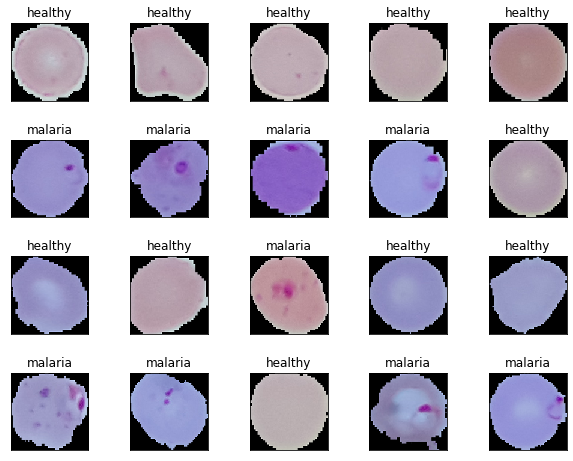

In [40]:
matplotlib.pyplot.figure(1 , figsize = (10 , 10))
n = 0 
for i in range(20):
    n += 1 
    r = np.random.randint(0 , train_data.shape[0] , 1)
    plt.subplot(5 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(train_data[r[0]]/255.)
    plt.title('{}'.format(train_y[r[0]]))
    plt.xticks([]) , plt.yticks([])

In [46]:
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 25
INPUT_SHAPE = (130, 130, 3)

train_imgs_scaled = train_data / 255.
val_imgs_scaled = val_data / 255.

# encode text category labels
le = LabelEncoder()
le.fit(train_y)
train_y_enc = le.transform(train_y)
val_y_enc = le.transform(val_y)

print(train_y[:6], train_y_enc[:6])


['malaria' 'malaria' 'malaria' 'healthy' 'healthy' 'malaria'] [1 1 1 0 0 1]


In [47]:
#CNN
inp = tf.keras.layers.Input(shape=INPUT_SHAPE)

conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), 
                               activation='relu', padding='same')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), 
                               activation='relu', padding='same')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

flat = tf.keras.layers.Flatten()(pool3)

hidden1 = tf.keras.layers.Dense(512, activation='relu')(flat)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 130, 130, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 130, 130, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 65, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 65, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D) 

In [49]:
logdir = os.path.join(r'C:\Users\Muruganandam\Desktop\MakeAthon\Ref\tensorboard_logs', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.000001)
callbacks = [reduce_lr, tensorboard_callback]

history = model.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS, 
                    validation_data=(val_imgs_scaled, val_labels_enc), 
                    callbacks=callbacks,
                    verbose=1)

Train on 17361 samples, validate on 1929 samples
Epoch 1/25
17361/17361 [==============================] - 332s 19ms/sample - loss: 0.6351 - acc: 0.6398 - val_loss: 0.3044 - val_acc: 0.9051
Epoch 2/25
17361/17361 [==============================] - 321s 18ms/sample - loss: 0.2445 - acc: 0.9164 - val_loss: 0.1678 - val_acc: 0.9399
Epoch 3/25
17361/17361 [==============================] - 321s 19ms/sample - loss: 0.1664 - acc: 0.9423 - val_loss: 0.1765 - val_acc: 0.9352
Epoch 4/25
17361/17361 [==============================] - 336s 19ms/sample - loss: 0.1537 - acc: 0.9517 - val_loss: 0.1508 - val_acc: 0.9539
Epoch 5/25
17361/17361 [==============================] - 347s 20ms/sample - loss: 0.1076 - acc: 0.9634 - val_loss: 0.1476 - val_acc: 0.9492
Epoch 6/25
17361/17361 [==============================] - 336s 19ms/sample - loss: 0.0783 - acc: 0.9730 - val_loss: 0.1589 - val_acc: 0.9544
Epoch 7/25
17361/17361 [==============================] - 348s 20ms/sample - loss: 0.0492 - acc: 0.9840 -